# **Laboratory 2 TDSE - Heart Disease Risk Prediction: Logistic Regression**
Juan Sebastian Puentes Julio

# 1. **SETUP**

In [ ]:
%pip install numpy pandas matplotlib

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

# 2. **DATASET**

In [ ]:
path = kagglehub.dataset_download("neurocipher/heartdisease")

df = pd.read_csv(os.path.join(path,'Heart_Disease_Prediction.csv'))
df.head()

Using Colab cache for faster access to the 'heartdisease' dataset.


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
# ABSENCE = 1 and PRESENCE = 0
dt = df.replace({"Presence":1,"Absence":0})

dt.head()

/tmp/ipython-input-1399045284.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt = df.replace({"Presence":1,"Absence":0})


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


# 3. **EXPLORING DATA ANALYSIS**

In [ ]:
dt.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


### **Data Analysis**

The data set shows a total of 270 data where the ages range between 29 and 77 years, with an average age of approximately 54 years. Cholesterol levels have a wide range, reaching values ​​as high as 564, which is medically plausible and is therefore maintained.

The objective variable indicates that approximately 44% of patients have heart disease.

In [ ]:
dt.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


No missing values were found.

In [ ]:
dt["Heart Disease"].value_counts()


,count
Heart Disease,
0,150
1,120


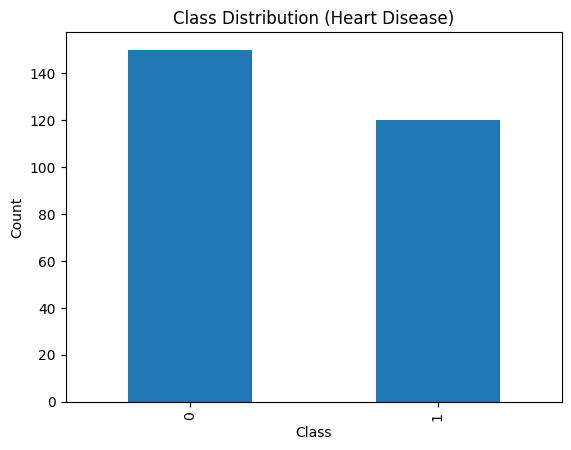

In [ ]:
plt.figure()
dt["Heart Disease"].value_counts().plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution (Heart Disease)")
plt.show()


44% of patients presents Heart Diseases.

# 3.1 **OUTLIERS**

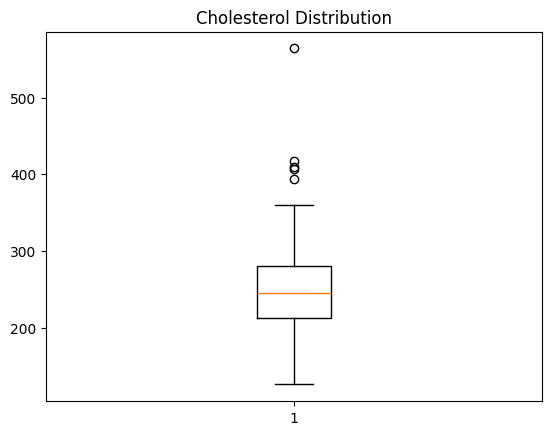

In [ ]:
plt.boxplot(dt["Cholesterol"])
plt.title("Cholesterol Distribution")
plt.show()


5 cholesterol outliers are observed, but are maintained due to their medical relevance. This may indicate high-risk patients.

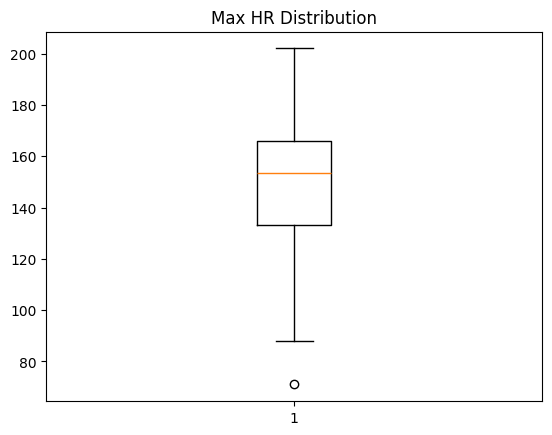

In [ ]:
plt.boxplot(dt["Max HR"])
plt.title("Max HR Distribution")
plt.show()

A very low maximum heart rate may indicate ischemia, heart failure or heart blocks and therefore represents clinically relevant information.

# 4. **PREPARATION**

In [ ]:
# SELECTED FEATURES
features = ["Age","Thallium","Chest pain type","BP","Cholesterol","Max HR"]
x = dt[features]
y = dt["Heart Disease"]

x.head()

,Age,Thallium,Chest pain type,BP,Cholesterol,Max HR
0,70,3,4,130,322,109
1,67,7,3,115,564,160
2,57,7,2,124,261,141
3,64,7,4,128,263,105
4,74,3,2,120,269,121


In [ ]:
#70% - TRAIN / 30% TEST
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

**Normalization Formula**

$$
x_{\text{norm}} = \frac{x - \mu}{\sigma}
$$

where $\mu$ and $\sigma$ are computed from the training set.



In [ ]:
#NORMALIZE
X_mean = x_train.mean() #Mu
X_std = x_train.std() #Sigma

X_train = (x_train - X_mean) / X_std
X_test = (x_test - X_mean) / X_std

X_train.head()

,Age,Thallium,Chest pain type,BP,Cholesterol,Max HR
78,-1.351555,-0.840399,-0.128026,-0.650952,-0.715485,1.015432
57,0.640642,-0.840399,-0.128026,-0.650952,-1.296339,-2.446171
256,0.751319,-0.840399,-0.128026,1.041344,-0.078419,-0.602980
214,-2.790363,-0.840399,-1.136231,-0.086853,-0.809171,2.319153
176,-0.355457,1.229118,0.880179,0.477245,0.952129,-1.277318


# 5. **IMPLEMENT BASIC LOGISTIC REGRESSION**

In [ ]:
def sigmoid(z):
    """Compute the sigmoid of z."""
    return 1 / (1 + np.exp(-z))

In [ ]:
def compute_cost(w, b, X, y):
    """Compute logistic regression cost J(w, b) using explicit model."""
    m, n = X.shape

    # For each example i: f_{w,b}^{(i)}(x^{(i)}) = sigmoid(w^T x^{(i)} + b)
    z = X @ w + b
    f = sigmoid(z)

    # To avoid log(0), clip probabilities
    eps = 1e-8
    f_clipped = np.clip(f, eps, 1 - eps)

    J = -(1 / m) * np.sum(
        y * np.log(f_clipped) + (1 - y) * np.log(1 - f_clipped)
    )
    return J

In [ ]:
def compute_gradient(w, b, X, y):
    """Compute gradients dJ/dw and dJ/db with explicit model."""
    m, n = X.shape

    # f_{w,b}^{(i)}(x^{(i)})
    z = X @ w + b
    f = sigmoid(z)

    error = f - y  # e^{(i)} = f_{w,b}^{(i)}(x^{(i)}) - y^{(i)}

    dj_dw = (1 / m) * (X.T @ error)
    dj_db = (1 / m) * np.sum(error)

    return dj_dw, dj_db

In [ ]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters, print_every=100):
    """Run gradient descent to optimize w and b."""
    w = w_init.copy()
    b = b_init
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(w, b, X, y)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J = compute_cost(w, b, X, y)
        J_history.append(J)

        if print_every > 0 and (i % print_every == 0 or i == num_iters - 1):
            print(f"Iteration {i:4d}: J(w, b) = {J:.4f}")

    return w, b, J_history

In [ ]:
def predict(X,w,b,threshold = 0.5):
  z = X @ w + b
  f = sigmoid(z)
  return (f >= threshold).astype(int)

In [ ]:
#TRAIN
m, n = X_train.shape
w_init = np.zeros(n)
b_init = 0
w, b, J_history = gradient_descent( X_train, y_train, w_init, b_init, alpha=0.01, num_iters=2000)

#TEST
y_pred = predict(X_test,w,b)




Iteration    0: J(w, b) = 0.6915
Iteration  100: J(w, b) = 0.5832
Iteration  200: J(w, b) = 0.5327
Iteration  300: J(w, b) = 0.5062
Iteration  400: J(w, b) = 0.4911
Iteration  500: J(w, b) = 0.4818
Iteration  600: J(w, b) = 0.4758
Iteration  700: J(w, b) = 0.4717
Iteration  800: J(w, b) = 0.4690
Iteration  900: J(w, b) = 0.4670
Iteration 1000: J(w, b) = 0.4656
Iteration 1100: J(w, b) = 0.4646
Iteration 1200: J(w, b) = 0.4638
Iteration 1300: J(w, b) = 0.4633
Iteration 1400: J(w, b) = 0.4628
Iteration 1500: J(w, b) = 0.4625
Iteration 1600: J(w, b) = 0.4622
Iteration 1700: J(w, b) = 0.4620
Iteration 1800: J(w, b) = 0.4618
Iteration 1900: J(w, b) = 0.4617
Iteration 1999: J(w, b) = 0.4616


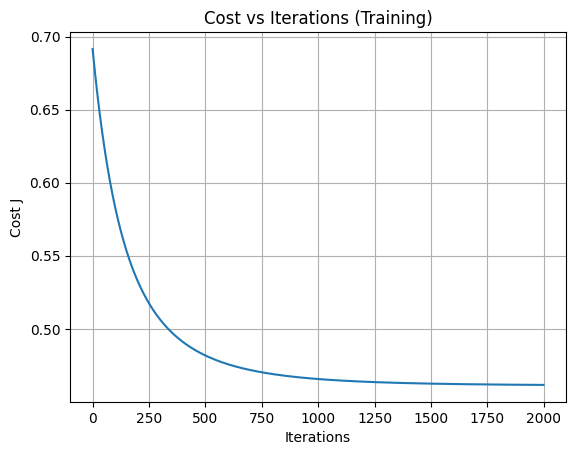

In [ ]:
plt.figure()
plt.plot(J_history)
plt.xlabel("Iterations")
plt.ylabel("Cost J")
plt.title("Cost vs Iterations (Training)")
plt.grid(True)
plt.show()

In [ ]:
def compute_metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp + 1e-8)
    recall = tp / (tp + fn + 1e-8)
    f1 = 2 * precision * recall / (precision + recall + 1e-8)

    return accuracy, precision, recall, f1


In [ ]:
# TRAIN PREDICTIONS
y_train_pred = predict(X_train, w, b)

# TEST PREDICITIONS
y_test_pred = predict(X_test, w, b)

train_metrics = compute_metrics(y_train, y_train_pred)
test_metrics = compute_metrics(y_test, y_test_pred)

metrics_df = pd.DataFrame(
    [train_metrics, test_metrics],
    columns=["Accuracy", "Precision", "Recall", "F1-score"],
    index=["Train", "Test"]
)

metrics_df



,Accuracy,Precision,Recall,F1-score
Train,0.798942,0.7875,0.750000,0.768293
Test,0.827160,0.7750,0.861111,0.815789


The cost function decreased monotonically and converged, indicating successful training.
The model achieved high recall in the test set (0.87), which is crucial in medical diagnosis as it ensures the correct identification of most patients with heart disease.

# 5. **DECISION BOUNDARIES**

## CHOLESTEROL - MAX HR

In [ ]:
#1
features = ["Cholesterol", "Max HR"]
x1 = dt[features]
y1 = dt["Heart Disease"]

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x1, y1, test_size=0.3, random_state=42, stratify=y1)

#NORMALIZE
X_mean_1 = x_train_1.mean()
X_std_1 = x_train_1.std()

X_train_1 = (x_train_1 - X_mean_1) / X_std_1
X_test_1  = (x_test_1 - X_mean_1) / X_std_1

X_train_1.head()

,Cholesterol,Max HR
78,-0.715485,1.015432
57,-1.296339,-2.446171
256,-0.078419,-0.602980
214,-0.809171,2.319153
176,0.952129,-1.277318


In [ ]:
#TRAIN - #1
m, n = X_train_1.shape
w_init = np.zeros(n)
b_init = 0
w_1, b_1, J_history_1 = gradient_descent(X_train_1,y_train_1,w_init,b_init,alpha=0.01,num_iters=2000)

#TEST - #1
y_pred_1 = predict(X_test_1,w_1,b_1)

Iteration    0: J(w, b) = 0.6927
Iteration  100: J(w, b) = 0.6548
Iteration  200: J(w, b) = 0.6316
Iteration  300: J(w, b) = 0.6170
Iteration  400: J(w, b) = 0.6077
Iteration  500: J(w, b) = 0.6015
Iteration  600: J(w, b) = 0.5974
Iteration  700: J(w, b) = 0.5946
Iteration  800: J(w, b) = 0.5927
Iteration  900: J(w, b) = 0.5913
Iteration 1000: J(w, b) = 0.5904
Iteration 1100: J(w, b) = 0.5897
Iteration 1200: J(w, b) = 0.5892
Iteration 1300: J(w, b) = 0.5889
Iteration 1400: J(w, b) = 0.5886
Iteration 1500: J(w, b) = 0.5884
Iteration 1600: J(w, b) = 0.5883
Iteration 1700: J(w, b) = 0.5882
Iteration 1800: J(w, b) = 0.5881
Iteration 1900: J(w, b) = 0.5881
Iteration 1999: J(w, b) = 0.5880


/tmp/ipython-input-911210123.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2_vals = -(w_1[0] * x1_vals + b_1) / w_1[1]


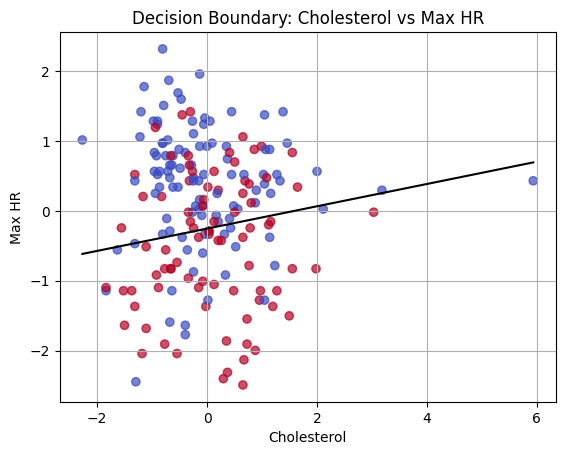

In [ ]:
x1_vals = np.linspace(X_train_1.iloc[:,0].min(),X_train_1.iloc[:,0].max(),100)
x2_vals = -(w_1[0] * x1_vals + b_1) / w_1[1]

plt.figure()
plt.scatter(
    X_train_1.iloc[:,0],
    X_train_1.iloc[:,1],
    c=y_train_1,
    cmap="coolwarm",
    alpha=0.7
)
plt.plot(x1_vals, x2_vals, color="black")

plt.xlabel("Cholesterol")
plt.ylabel("Max HR")
plt.title("Decision Boundary: Cholesterol vs Max HR")
plt.grid(True)
plt.show()


### Decision Boundary: Cholesterol vs Max Heart Rate

The decision boundary shows significant overlap between patients with and without heart disease.

## THALLIUM - AGE

In [ ]:
#2
features = ["Thallium", "Age"]
x2 = dt[features]
y2 = dt["Heart Disease"]

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x2, y2, test_size=0.3, random_state=42, stratify=y2)

#NORMALIZE
X_mean_2 = x_train_2.mean()
X_std_2 = x_train_2.std()

X_train_2 = (x_train_2 - X_mean_2) / X_std_2
X_test_2  = (x_test_2 - X_mean_2) / X_std_2

X_train_2.head()

,Thallium,Age
78,-0.840399,-1.351555
57,-0.840399,0.640642
256,-0.840399,0.751319
214,-0.840399,-2.790363
176,1.229118,-0.355457


In [ ]:
#TRAIN - #2
m, n = X_train_2.shape
w_init = np.zeros(n)
b_init = 0
w_2, b_2, J_history_2 = gradient_descent(X_train_2,y_train_2,w_init,b_init,alpha=0.01,num_iters=2000)

#TEST - #2
y_pred_2 = predict(X_test_2,w_2,b_2)

Iteration    0: J(w, b) = 0.6924
Iteration  100: J(w, b) = 0.6381
Iteration  200: J(w, b) = 0.6056
Iteration  300: J(w, b) = 0.5858
Iteration  400: J(w, b) = 0.5734
Iteration  500: J(w, b) = 0.5656
Iteration  600: J(w, b) = 0.5605
Iteration  700: J(w, b) = 0.5571
Iteration  800: J(w, b) = 0.5549
Iteration  900: J(w, b) = 0.5534
Iteration 1000: J(w, b) = 0.5524
Iteration 1100: J(w, b) = 0.5517
Iteration 1200: J(w, b) = 0.5513
Iteration 1300: J(w, b) = 0.5509
Iteration 1400: J(w, b) = 0.5507
Iteration 1500: J(w, b) = 0.5506
Iteration 1600: J(w, b) = 0.5505
Iteration 1700: J(w, b) = 0.5504
Iteration 1800: J(w, b) = 0.5503
Iteration 1900: J(w, b) = 0.5503
Iteration 1999: J(w, b) = 0.5503


/tmp/ipython-input-3209900814.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2_vals = -(w_2[0] * x1_vals + b_2) / w_2[1]


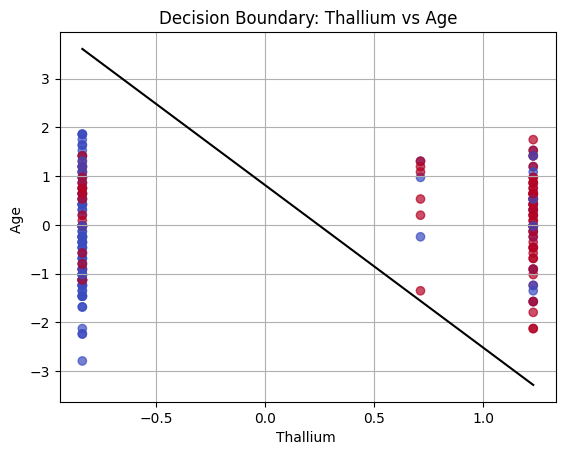

In [ ]:
x1_vals = np.linspace(X_train_2.iloc[:,0].min(),X_train_2.iloc[:,0].max(),100)
x2_vals = -(w_2[0] * x1_vals + b_2) / w_2[1]

plt.figure()
plt.scatter(
    X_train_2.iloc[:,0],
    X_train_2.iloc[:,1],
    c=y_train_2,
    cmap="coolwarm",
    alpha=0.7
)
plt.plot(x1_vals, x2_vals, color="black")

plt.xlabel("Thallium ")
plt.ylabel("Age ")
plt.title("Decision Boundary: Thallium vs Age")

plt.grid(True)
plt.show()

### Decision Boundary: Thallium vs Age

This feature pair exhibits clearer separation between classes.

## ST DEPRESSION vs NUMBER OF VESSELS

In [ ]:
#3
features = ["ST depression", "Number of vessels fluro"]
x3 = dt[features]
y3 = dt["Heart Disease"]

x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x3, y3, test_size=0.3, random_state=42, stratify=y3)

#NORMALIZE
X_mean_3 = x_train_3.mean()
X_std_3 = x_train_3.std()

X_train_3 = (x_train_3 - X_mean_3) / X_std_3
X_test_3  = (x_test_3 - X_mean_3) / X_std_3

X_train_3.head()

,ST depression,Number of vessels fluro
78,-0.939474,-0.702890
57,-0.939474,-0.702890
256,-0.045413,-0.702890
214,-0.939474,-0.702890
176,2.815584,2.674557


In [ ]:
#TRAIN - #3
m, n = X_train_3.shape
w_init = np.zeros(n)
b_init = 0
w_3, b_3, J_history_3 = gradient_descent(X_train_3,y_train_3,w_init,b_init,alpha=0.01,num_iters=2000)

#TEST - #3
y_pred_3 = predict(X_test_3,w_3,b_3)

Iteration    0: J(w, b) = 0.6922
Iteration  100: J(w, b) = 0.6214
Iteration  200: J(w, b) = 0.5824
Iteration  300: J(w, b) = 0.5595
Iteration  400: J(w, b) = 0.5453
Iteration  500: J(w, b) = 0.5361
Iteration  600: J(w, b) = 0.5300
Iteration  700: J(w, b) = 0.5258
Iteration  800: J(w, b) = 0.5228
Iteration  900: J(w, b) = 0.5207
Iteration 1000: J(w, b) = 0.5192
Iteration 1100: J(w, b) = 0.5180
Iteration 1200: J(w, b) = 0.5172
Iteration 1300: J(w, b) = 0.5166
Iteration 1400: J(w, b) = 0.5161
Iteration 1500: J(w, b) = 0.5157
Iteration 1600: J(w, b) = 0.5155
Iteration 1700: J(w, b) = 0.5153
Iteration 1800: J(w, b) = 0.5151
Iteration 1900: J(w, b) = 0.5150
Iteration 1999: J(w, b) = 0.5149


/tmp/ipython-input-693035721.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2_vals = -(w_3[0] * x1_vals + b_2) / w_3[1]


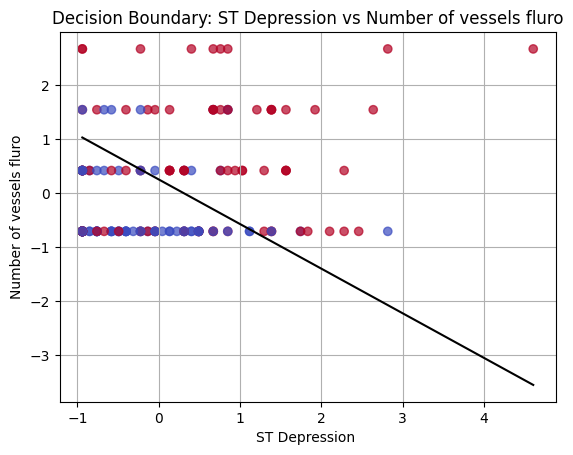

In [ ]:
x1_vals = np.linspace(X_train_3.iloc[:,0].min(),X_train_3.iloc[:,0].max(),100)
x2_vals = -(w_3[0] * x1_vals + b_2) / w_3[1]

plt.figure()
plt.scatter(
    X_train_3.iloc[:,0],
    X_train_3.iloc[:,1],
    c=y_train_3,
    cmap="coolwarm",
    alpha=0.7
)
plt.plot(x1_vals, x2_vals, color="black")

plt.xlabel("ST Depression ")
plt.ylabel("Number of vessels fluro")
plt.title("Decision Boundary: ST Depression vs Number of vessels fluro")

plt.grid(True)
plt.show()

### Decision Boundary: ST Depression vs Number of Vessel

There is no clear separation of the data.

## **ANALYSIS**

Analysis of decision boundaries using different feature pairs reveals that not all clinical variables contribute equally to predicting heart disease. The Cholesterol vs. Maximum Heart Rate visualization shows significant overlap between patients with and without heart disease, indicating weak linear separability when using these features alone. In contrast, the Thallium vs. Age decision boundary shows markedly better class separation. Finally, ST depression and Number of vessels are not good characteristics to compare since the decision line and these points cannot be distinguished, making the prediction confusing.

# 6. **REPEAT WITH REGULARIZATION**

In [ ]:
def compute_cost_log_reg_reg(w, b, X, y, lam):
    """Regularized logistic regression cost."""
    m, n = X.shape
    z = X @ w + b
    f = sigmoid(z)
    eps = 1e-8
    f_clipped = np.clip(f, eps, 1 - eps)
    # Cross-entropy term
    ce = - (1 / m) * np.sum(
        y * np.log(f_clipped) + (1 - y) * np.log(1 - f_clipped)
    )

    reg = (lam / (2 * m)) * np.sum(w ** 2)
    return ce + reg

In [ ]:
def compute_gradient_log_reg_reg(w, b, X, y, lam):
    """Gradient of regularized logistic regression cost."""
    m, n = X.shape
    z = X @ w + b
    f = sigmoid(z)
    error = f - y  # f_{w,b}^{(i)}(x^{(i)}) - y^{(i)}
    dj_dw = (1 / m) * (X.T @ error) + (lam / m) * w
    dj_db = (1 / m) * np.sum(error)
    return dj_dw, dj_db

In [ ]:
def gradient_descent_log_reg_reg(X, y, w_init, b_init, alpha, lam, num_iters):
    w = w_init.copy()
    b = b_init
    J_history = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_log_reg_reg(w, b, X, y, lam)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        J_history.append(compute_cost_log_reg_reg(w, b, X, y, lam))
    return w, b, J_history

In [ ]:
def plot_decision_boundary_logreg(w, b, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    z = grid @ w + b
    probs = sigmoid(z).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.2, colors=["tab:blue", "tab:orange"])
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="y = 0")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="y = 1")
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.show()

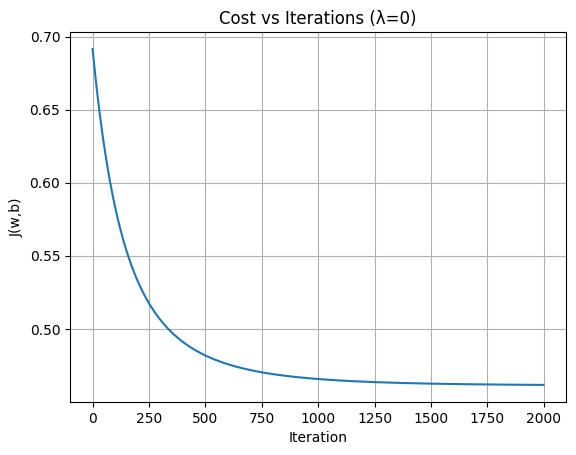

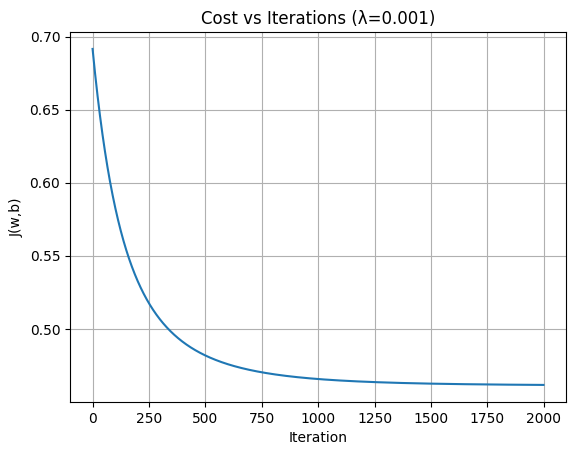

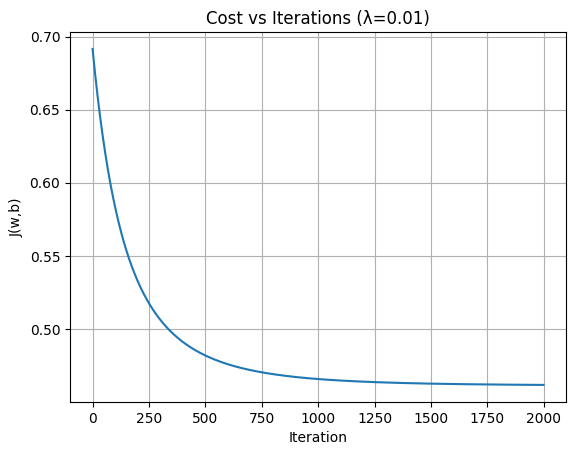

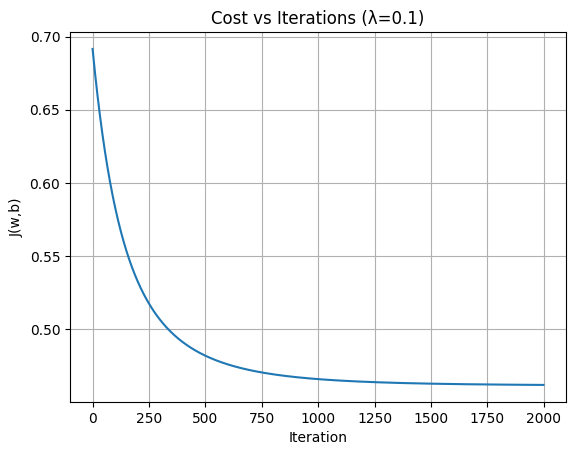

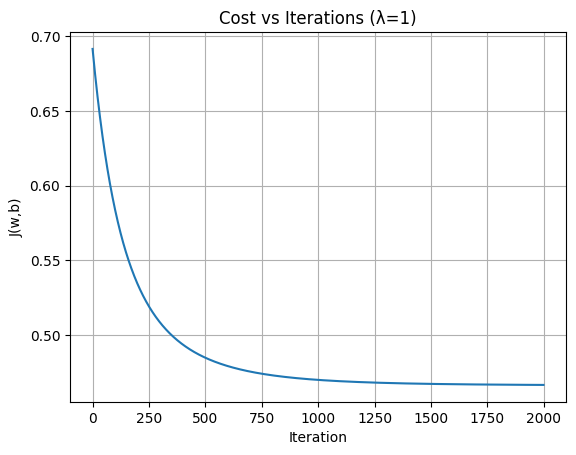

In [ ]:
def reTrainModelWithRegularization(X_train, y_train, X_test, y_test,
                                   alpha, lambdas, num_iters):

    results = []

    for l in lambdas:
        w0 = np.zeros(X_train.shape[1])
        b0 = 0.0

        w, b, J_history = gradient_descent_log_reg_reg(
            X_train.values, y_train.values,
            w0, b0, alpha, l, num_iters
        )

        plt.figure()
        plt.plot(J_history)
        plt.title(f"Cost vs Iterations (λ={l})")
        plt.xlabel("Iteration")
        plt.ylabel("J(w,b)")
        plt.grid(True)
        plt.show()

        #Predictions
        y_train_pred = predict(X_train.values, w, b)
        y_test_pred  = predict(X_test.values, w, b)

        #Metrics
        train_acc, train_prec, train_rec, train_f1 = compute_metrics(y_train.values, y_train_pred)
        test_acc, test_prec, test_rec, test_f1 = compute_metrics(y_test.values, y_test_pred)

        w_norm = np.linalg.norm(w)

        results.append([
            l,
            train_acc, train_prec, train_rec, train_f1,
            test_acc, test_prec, test_rec, test_f1,
            w_norm
        ])

    return results

lambdas = [0, 0.001, 0.01, 0.1, 1]

results = reTrainModelWithRegularization(
    X_train, y_train,X_test, y_test,
    alpha=0.01,
    lambdas=lambdas,
    num_iters=2000
)




## CHOLESTEROL - MAX HR

NO REGULARIZATION

/tmp/ipython-input-2188945376.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2_vals = -(w_1[0] * x1_vals + b_1) / w_1[1]


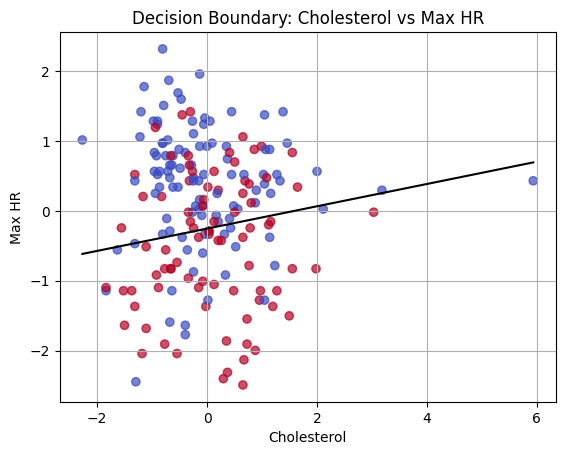

In [ ]:
x1_vals = np.linspace(X_train_1.iloc[:,0].min(),X_train_1.iloc[:,0].max(),100)
x2_vals = -(w_1[0] * x1_vals + b_1) / w_1[1]

plt.figure()
plt.scatter(
    X_train_1.iloc[:,0],
    X_train_1.iloc[:,1],
    c=y_train_1,
    cmap="coolwarm",
    alpha=0.7
)
plt.plot(x1_vals, x2_vals, color="black")

plt.xlabel("Cholesterol")
plt.ylabel("Max HR")
plt.title("Decision Boundary: Cholesterol vs Max HR")
plt.grid(True)
plt.show()

REGULARIZATION

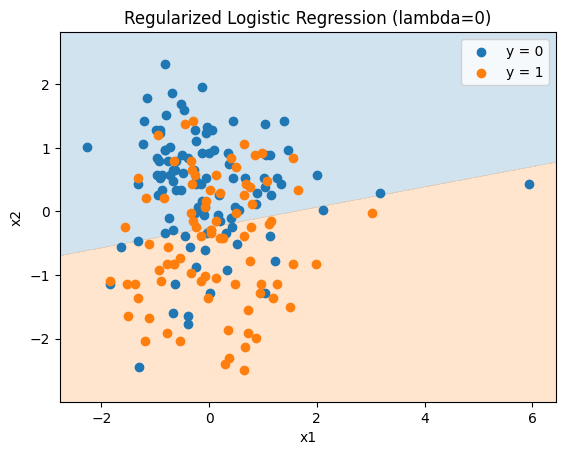

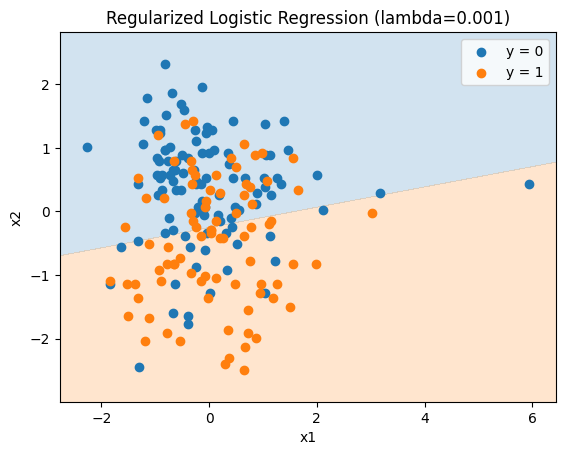

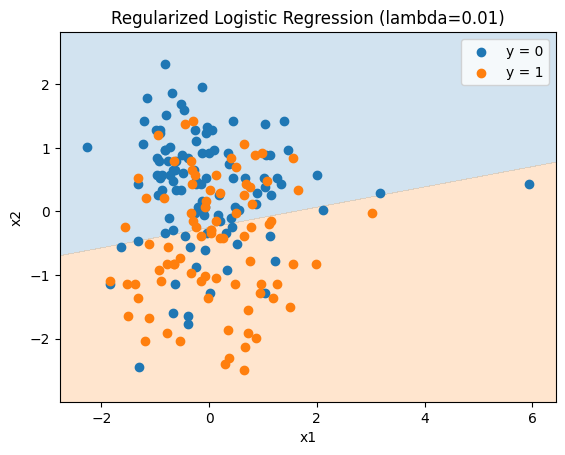

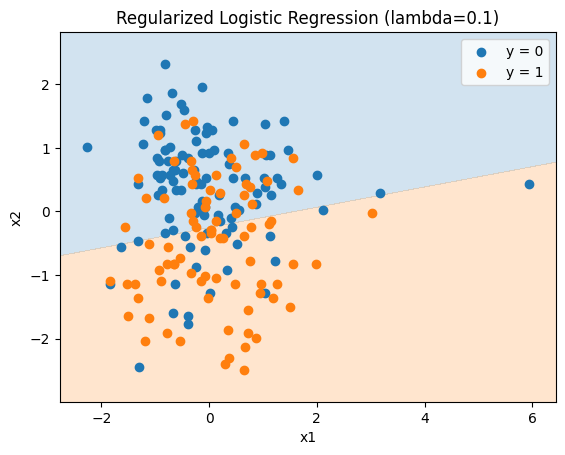

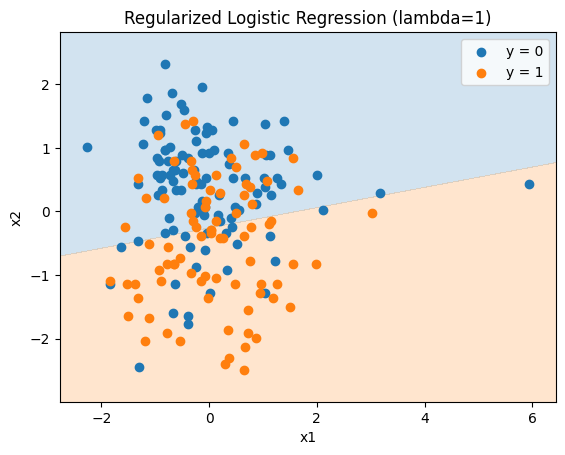

In [ ]:
def reTrainPairModel(X_train, y_train,alpha, lamdas, num_iters):
    for l in lamdas:
        w0 = np.zeros(X_train.shape[1])
        b0 = 0.0

        wR, bR, J_history = gradient_descent_log_reg_reg(X_train, y_train, w0, b0, alpha, l, num_iters)

        plot_decision_boundary_logreg(wR, bR, X_train, y_train, title=f"Regularized Logistic Regression (lambda={l})")

reTrainPairModel(X_train_1.values,y_train_1.values,0.01,lambdas, 2000)

## THALLIUM - AGE

NO REGULARIZATION

/tmp/ipython-input-3209900814.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2_vals = -(w_2[0] * x1_vals + b_2) / w_2[1]


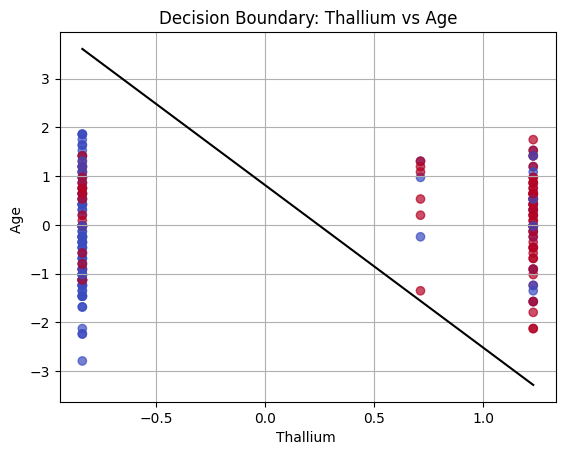

In [ ]:
x1_vals = np.linspace(X_train_2.iloc[:,0].min(),X_train_2.iloc[:,0].max(),100)
x2_vals = -(w_2[0] * x1_vals + b_2) / w_2[1]

plt.figure()
plt.scatter(
    X_train_2.iloc[:,0],
    X_train_2.iloc[:,1],
    c=y_train_2,
    cmap="coolwarm",
    alpha=0.7
)
plt.plot(x1_vals, x2_vals, color="black")

plt.xlabel("Thallium ")
plt.ylabel("Age ")
plt.title("Decision Boundary: Thallium vs Age")

plt.grid(True)
plt.show()

REGULARIZATION

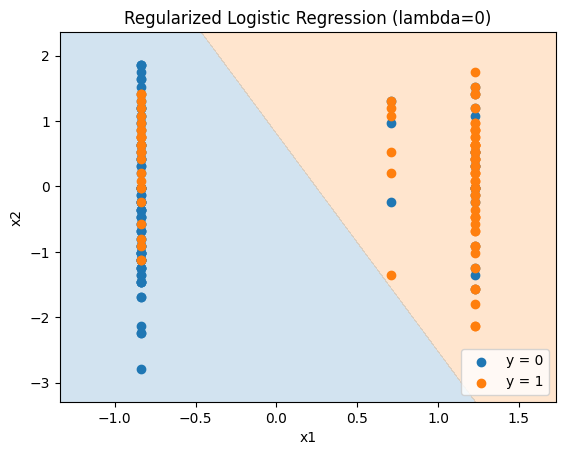

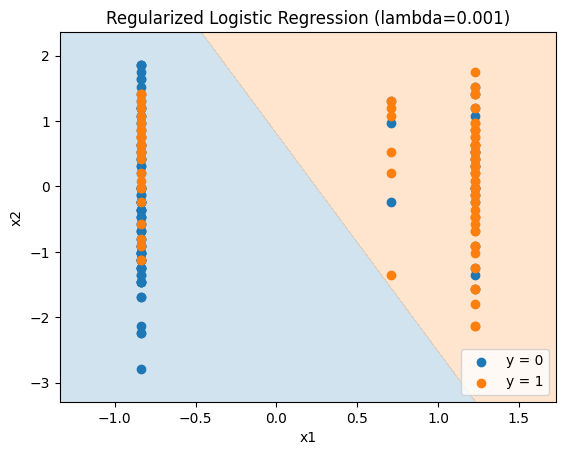

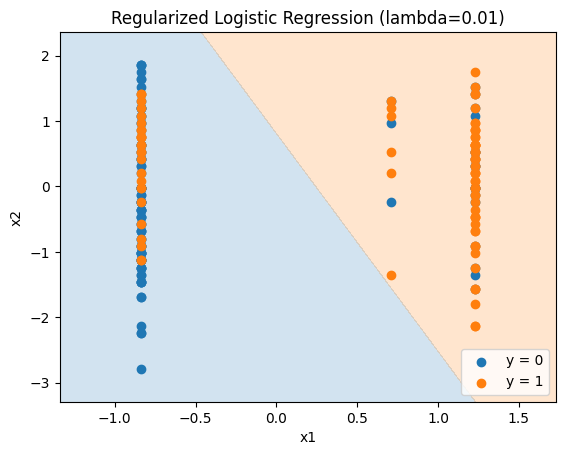

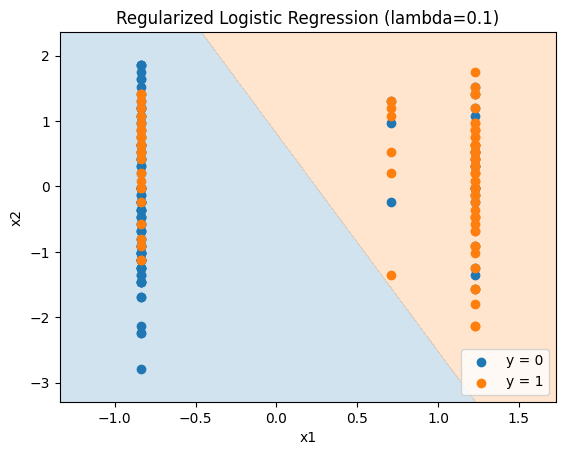

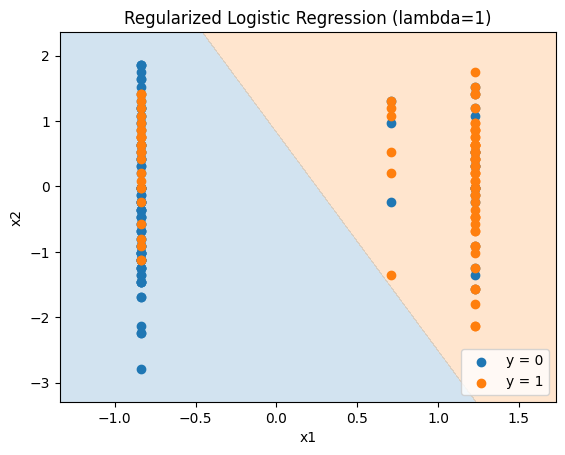

In [ ]:
reTrainPairModel(X_train_2.values,y_train_2.values,0.01,lambdas, 2000)

## ST Depression - Number of vessels fluro

NO REGULARIZATION

/tmp/ipython-input-693035721.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x2_vals = -(w_3[0] * x1_vals + b_2) / w_3[1]


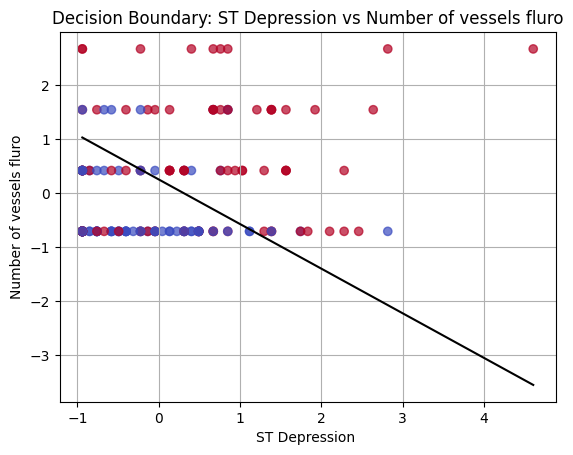

In [ ]:
x1_vals = np.linspace(X_train_3.iloc[:,0].min(),X_train_3.iloc[:,0].max(),100)
x2_vals = -(w_3[0] * x1_vals + b_2) / w_3[1]

plt.figure()
plt.scatter(
    X_train_3.iloc[:,0],
    X_train_3.iloc[:,1],
    c=y_train_3,
    cmap="coolwarm",
    alpha=0.7
)
plt.plot(x1_vals, x2_vals, color="black")

plt.xlabel("ST Depression ")
plt.ylabel("Number of vessels fluro")
plt.title("Decision Boundary: ST Depression vs Number of vessels fluro")

plt.grid(True)
plt.show()

REGULARIZATION

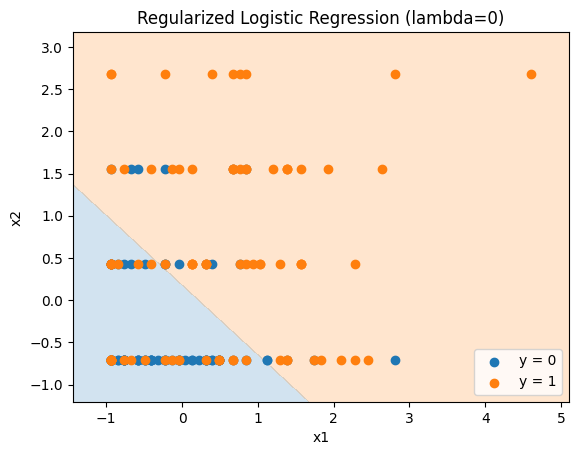

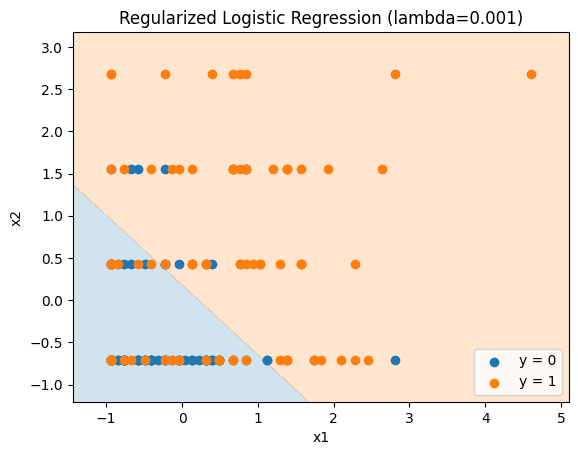

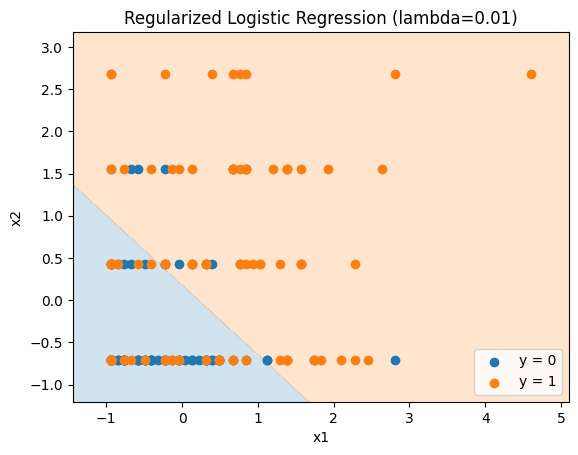

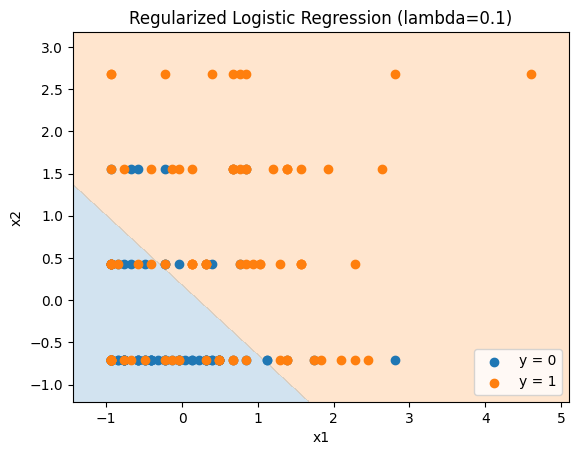

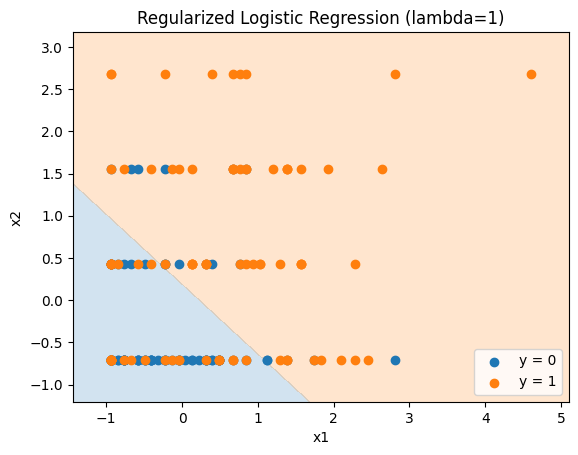

In [ ]:
reTrainPairModel(X_train_3.values,y_train_3.values,0.01,lambdas, 2000)

METRICS PLOT

In [ ]:
columns = [
    "Lambda",
    "Train Acc", "Train Prec", "Train Recall", "Train F1",
    "Test Acc", "Test Prec", "Test Recall", "Test F1",
    "||w||"
]

df_results = pd.DataFrame(results, columns=columns)
df_results

,Lambda,Train Acc,Train Prec,Train Recall,Train F1,Test Acc,Test Prec,Test Recall,Test F1,||w||
0,0.000,0.798942,0.787500,0.75,0.768293,0.827160,0.775000,0.861111,0.815789,1.342581
1,0.001,0.798942,0.787500,0.75,0.768293,0.827160,0.775000,0.861111,0.815789,1.342540
2,0.010,0.798942,0.787500,0.75,0.768293,0.827160,0.775000,0.861111,0.815789,1.342177
3,0.100,0.798942,0.787500,0.75,0.768293,0.827160,0.775000,0.861111,0.815789,1.338560
4,1.000,0.793651,0.777778,0.75,0.763636,0.814815,0.756098,0.861111,0.805195,1.303712


Regularization with L2 was evaluated using λ ∈ {0, 0.001, 0.01, 0.1, 1}. As λ increases, the L2 norm of the weight vector steadily decreases, confirming that regularization effectively limits model complexity.

Performance metrics remain stable for λ ≤ 0.1, indicating that the unregularized model did not exhibit significant overfitting. Finally, with λ = 0.1, test performance is maintained while reducing the magnitude of the weights.
